In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r'/home/laptop-obs-324/Datasets/Electric_Production.csv',parse_dates=['DATE'], index_col='DATE')
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
df.shape

(397, 2)

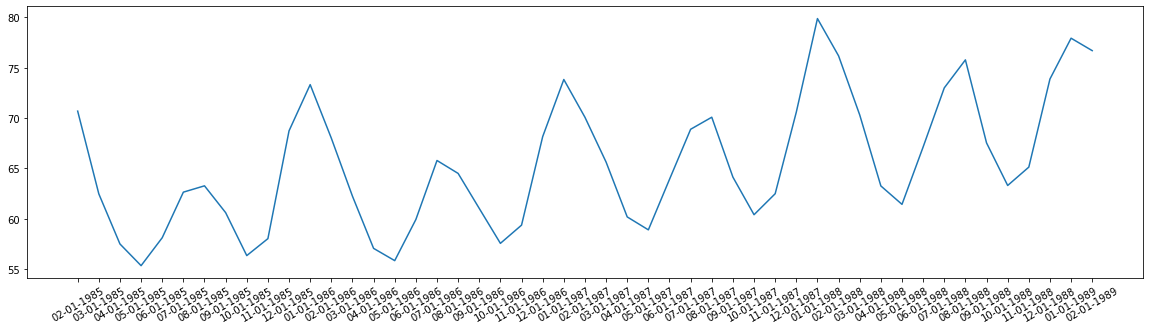

In [7]:
plt.plot(df[1:50]['DATE'],df[1:50]['Value'])
plt.xticks(rotation=30)
plt.show()

In [9]:
rollingseries = df[1:50].rolling(window=5)
rollingmean = rollingseries.mean()
rollingmean.head(10)

,Value
1,NaN
2,NaN
3,NaN
4,NaN
5,60.79982
6,59.18946
7,59.34912
8,59.97176
9,60.17182
10,60.15384


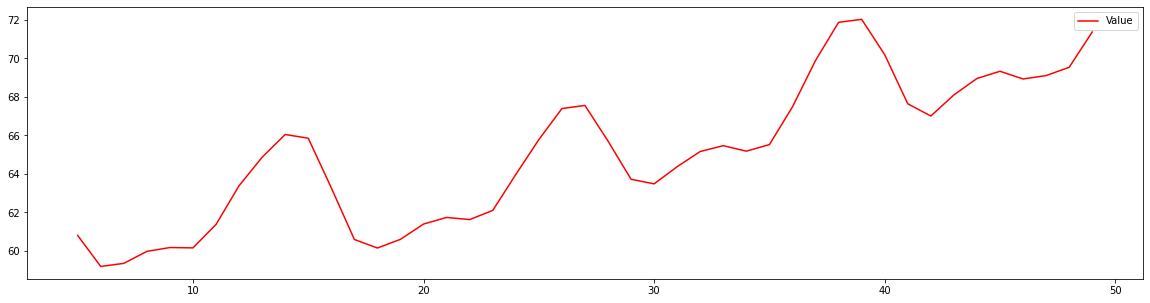

In [11]:
rollingmean.plot(color='red')
plt.show()

In [12]:
rollingseries = df[1:50].rolling(window=10)
rollingmean = rollingseries.mean()
rollingmean.head(10)

,Value
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,60.47683


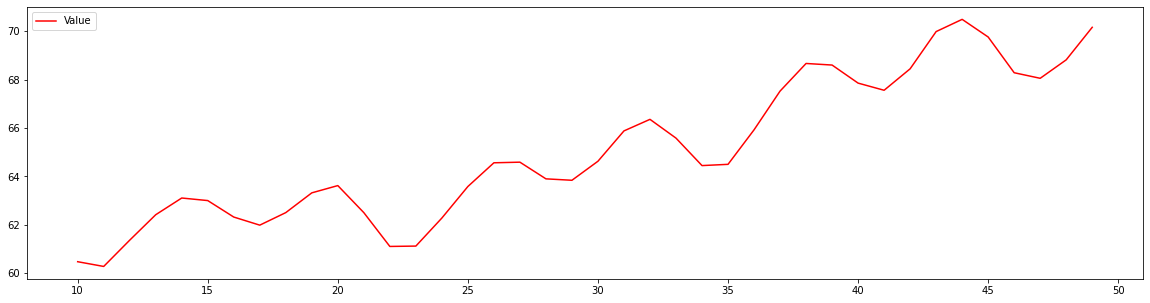

In [13]:
rollingmean.plot(color='red')
plt.show()

## Simple Exponential Smoothing

In [29]:
data = df[1:50]
fit1 = SimpleExpSmoothing(data.astype('float')).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data.astype('float')).fit(smoothing_level=0.8,optimized=False)

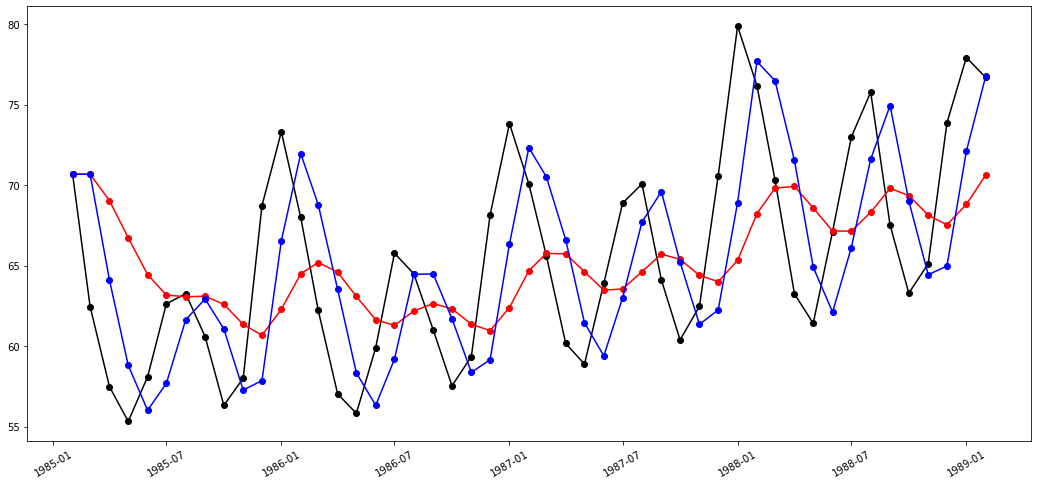

In [34]:
plt.figure(figsize=(18,8))
plt.plot(df[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='red')
plt.plot(fit2.fittedvalues,marker='o',color='blue')

## Holt Exponential smoothing

In [35]:
fit1 = Holt(data).fit() #linear trend
fit2 = Holt(data,exponential=True).fit() #Exponential trend

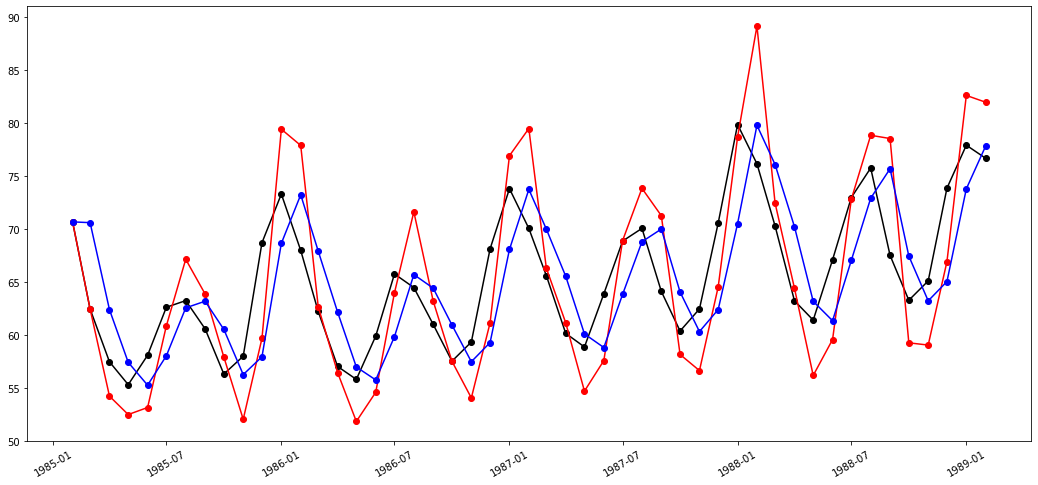

In [36]:
plt.figure(figsize=(18,8))
plt.plot(df[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='red')
plt.plot(fit2.fittedvalues,marker='o',color='blue')